In [203]:
#Assessment of my LinkedIn Connections (2015-2020) - by Jerome Blanchet
#Thank you to Guillaume Chevalier for his amazing github repository
#Source Code below from Guillaume Chevalier, with few customization and data cleansing of mine
#https://github.com/guillaume-chevalier/LinkedIn-Connections-Growth-Analysis/blob/master/plot.py

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from statsmodels.tsa.seasonal import seasonal_decompose

In [205]:
FIGSIZE = (16, 9)
FONT = {"family": "Share Tech Mono", "weight": "normal", "size": 16}
tds = "#0073b1"
week = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

In [206]:
df = pd.read_csv(r'C:\\Users\\18195\\Downloads\\Connections.csv')

In [207]:
df['Connected On'] = pd.to_datetime(df['Connected On'])
df.set_index('Connected On', inplace=True, drop=True)
df.sort_index(inplace=True)
df = df.assign(added=1)

In [208]:
#because recent connections are always more significant.
df.tail(60)

,First Name,Last Name,Email Address,Company,Position,added
Connected On,,,,,,
2020-04-07,Youssef,Raouane,NaN,Université de Montréal,Teacher Assistant,1
2020-04-07,David,Vázquez Bermúdez,NaN,Element AI,Research Scientist in Artificial Intelligence ...,1
2020-04-08,Avi,Schiffmann,NaN,AviSchiffmann,Creater of nCoV2019.live,1
2020-04-09,Fares,Sayah,NaN,Kaggle,Data scientist (Kaggle Master),1
2020-04-09,Zahid,Siddiqi,NaN,Public Health Agency of Canada | Agence de la ...,Front End Developer/Project Lead,1
2020-04-10,Amir,Belazouz,NaN,NaN,NaN,1
2020-04-10,Eilif Benjamin,Muller,NaN,Element AI,Applied Research Scientist,1
2020-04-10,Louis-Martin,Rousseau,NaN,Polytechnique Montréal,Professor,1
2020-04-10,Bhanu kant,Jhingan,NaN,J.P. Morgan,Senior Analyst,1


In [209]:
#Source Code from Guillaume Chevalier
#https://github.com/guillaume-chevalier/LinkedIn-Connections-Growth-Analysis/blob/master/plot.py

def plot_weekly_connection(df):
    weekly = df[["added"]].resample("W").sum()
    #style = dict(size=10, color='gray')

    fig, ax = plt.subplots(figsize=FIGSIZE)

    plt.plot(weekly.index, weekly.added, c=tds)

    plt.title("Raw LinkedIn connections evolution\n for Jerome Blanchet (2015-2020)\nNo Seasonal Adjustment", 
    fontdict=FONT, y=1.2)
    
    plt.ylabel("Nb weekly connections", fontdict=FONT)
    
    #ax.text('2012-01-01', 500, "New Year's Day", **style)
    
    ax.set_frame_on(False)
    plt.grid(True)
    plt.show()


def plot_cumsum(df):
    cumsum = df.added.cumsum()

    fig, ax = plt.subplots(figsize=FIGSIZE)

    plt.plot(cumsum.index, cumsum.values, c=tds)

    plt.title("LinkedIn connections evolution (cumulated)\n for Jerome Blanchet", fontdict=FONT, y=1.2)
    plt.ylabel("Nb connections", fontdict=FONT)

    ax.set_frame_on(False)
    plt.grid(True)
    plt.show()


def violins_prep(tmp):
    tmp = tmp.resample("D").sum()
    tmp = tmp.assign(dow=tmp.index.dayofweek.values).sort_values("dow")
    return tmp.assign(dow_str=tmp.dow.apply(lambda d: week[d]))


def plot_violins(df):
    violins = violins_prep(df[["added"]])

    fig, ax = plt.subplots(figsize=(20, 8))
    ax = sns.violinplot(x="dow_str", y="added", data=violins, color=tds, cut=0, ax=ax)

    plt.title("LinkedIn connections distribution per day of week\n for Jerome Blanchet", fontdict=FONT, y=1.2)
    plt.xlabel("Week day", fontdict=FONT)
    plt.ylabel("Nb daily connections", fontdict=FONT)

    ax.set_frame_on(False)
    plt.grid(True)
    plt.show()


def plot_bar_column(df, col):
    fnames = df[col].value_counts().head(30)
    plot_fnames(fnames,col)


def plot_nlp_cv(df):
    tfidf = CountVectorizer(ngram_range=(1, 3), stop_words='english')
    cleaned_positions = list(df["Position"].fillna(""))
    res = tfidf.fit_transform(cleaned_positions)
    res = res.toarray().sum(axis=0)

    fnames = pd.DataFrame(
        list(sorted(zip(res, tfidf.get_feature_names())))[-30:],
        columns=["Position by Words Freq", "Words"]
    )[::-1] 
    plot_fnames(fnames, "Position by Words Freq", "Words")


def plot_fnames(fnames, col, index="index"):
    fnames = fnames.reset_index()

    fig, ax = plt.subplots(figsize=FIGSIZE)

    plt.bar(
        x=fnames.index,
        height=fnames[col],
        color=tds,
        alpha=0.5
    )

    plt.title("{} distribution".format(col), fontdict=FONT, y=1.2)
    plt.xticks(
        fnames.index,
        fnames[index].str.capitalize(),
        rotation=65,
        ha="right",
        size=FONT["size"],
    )

    plt.ylabel("Nb occurences", fontdict=FONT)
    plt.yticks()#[0, 5, 10, 15, 20])
    ax.set_frame_on(False)
    plt.grid(True)

    plt.show()

In [210]:
#Custom data cleaning for repetitive company names

In [212]:
#The company I used to work for has several long title on LinkedIn
#Shorter and consistent name is better
#Apple is simply Apple right!
fnames = df['Company'].value_counts().head(50)
print(fnames)

Canada Mortgage and Housing Corporation (CMHC) Société canadienne d'hypothèques et de logement(SCHL)    217
Element AI                                                                                               62
Bank of Canada                                                                                           16
Société canadienne d'hypothèques et de logement(SCHL) Canada Mortgage and Housing Corporation (CMHC)     14
Transport Canada - Transports Canada                                                                     12
Canada Mortgage and Housing Corporation (CMHC)                                                           10
Moody's Analytics                                                                                        10
H2O.ai                                                                                                   10
Microsoft                                                                                                 9
Canada Mortgage and Housing 

In [213]:
#Let's build the dictionary and map everything

df.Company.replace({'CMHC - SCHL':'CMHC',
'Canada Mortgage and Housing Corporation':'CMHC',
'Canada Mortgage and Housing Corporation (CMHC)':'CMHC',
'Canada Mortgage and Housing Corporation CMHC / Société canadienne d\'hypothèques et de logement SCHL':'CMHC',
'Société canadienne d\'hypothèques et de logement(SCHL) Canada Mortgage and Housing Corporation (CMHC)':'CMHC',
'Canada Mortgage and Housing Corporation (CMHC) Société canadienne d\'hypothèques et de logement(SCHL)':'CMHC',
'Export Development Canada | Exportation et développement Canada - EDC':'EDC',
'Immigration, Refugees and Citizenship Canada / Immigration, Réfugiés et Citoyenneté Canada':'Immigration Canada',
'Transport Canada - Transports Canada':'Transport Canada'
}, inplace=True)

In [214]:
#Way better now and easier to read!!!!!!
fnames = df['Company'].value_counts().head(50)
print(fnames)

CMHC                                                         273
Element AI                                                    62
Bank of Canada                                                16
Transport Canada                                              13
H2O.ai                                                        10
Moody's Analytics                                             10
Microsoft                                                      9
OPTA Information Intelligence                                  8
Amazon                                                         8
Desjardins                                                     8
EDC                                                            7
Kaggle                                                         7
Statistics Canada                                              7
Groupe DDM                                                     6
Google                                                         6
IBM                      

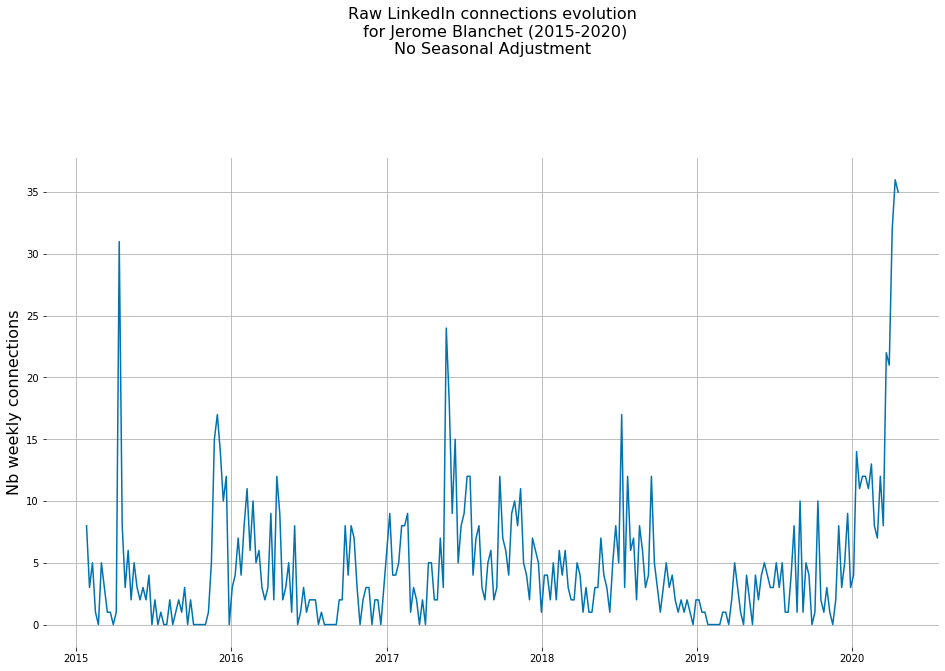

In [215]:
plot_weekly_connection(df)

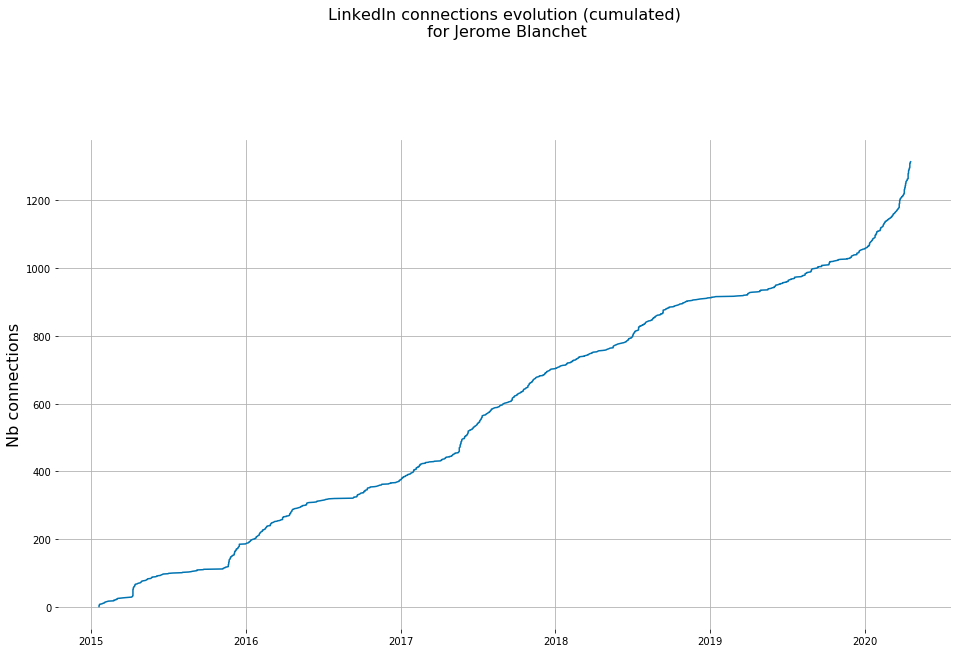

In [216]:
plot_cumsum(df)

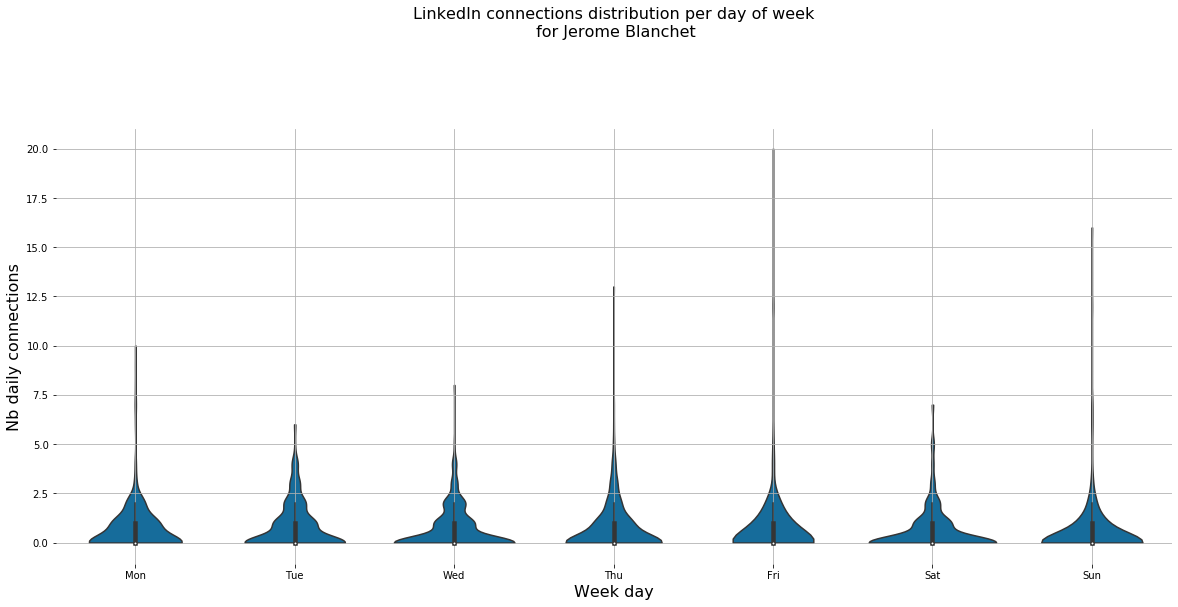

In [217]:
plot_violins(df)

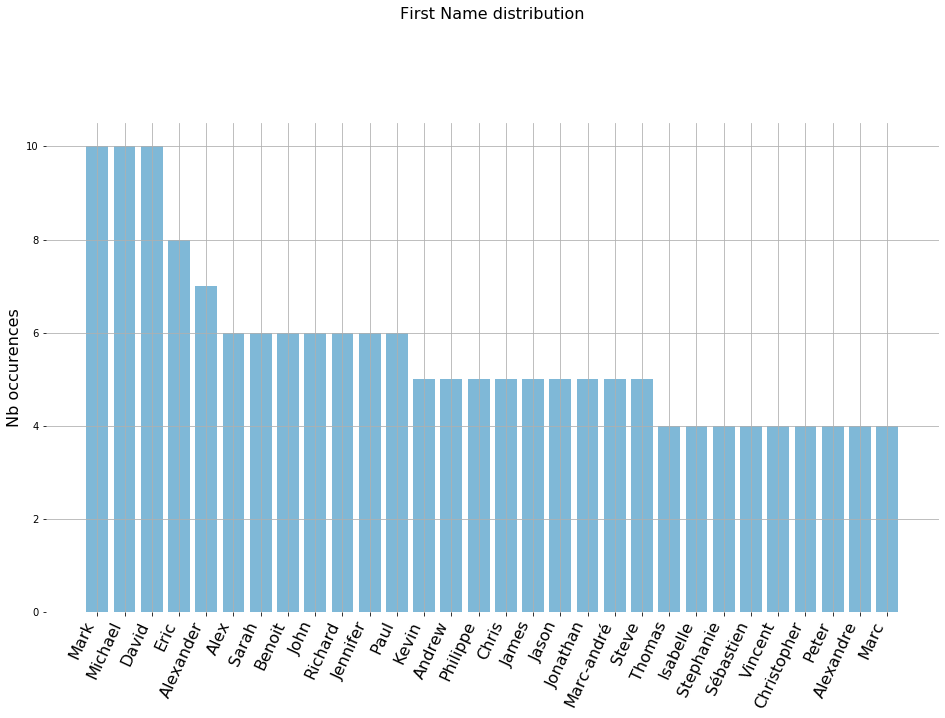

In [218]:
plot_bar_column(df, "First Name")

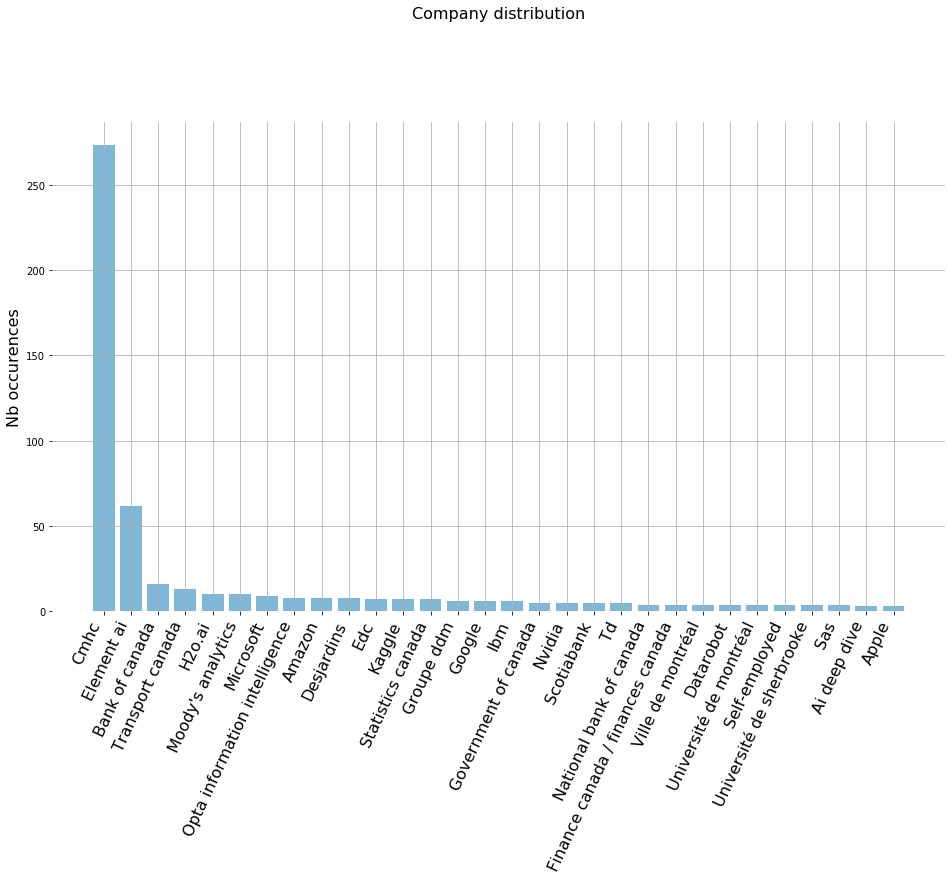

In [219]:
plot_bar_column(df, "Company")

C:\Users\18195\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 63767 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\18195\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 63767 missing from current font.
  font.set_text(s, 0, flags=flags)


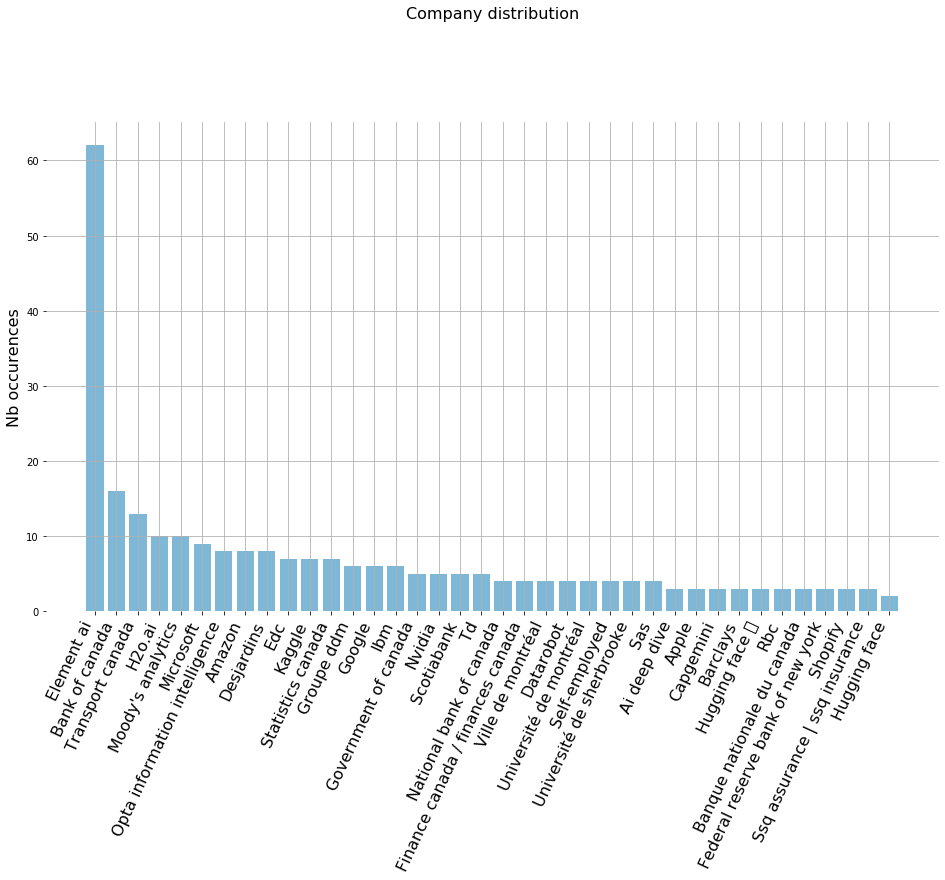

In [220]:
#Company distribution without CMHC

def plot_bar_columnn(df, col):
    fnames = df[col].value_counts().head(39)[1:]
    plot_fnames(fnames,col)

plot_bar_columnn(df, "Company")

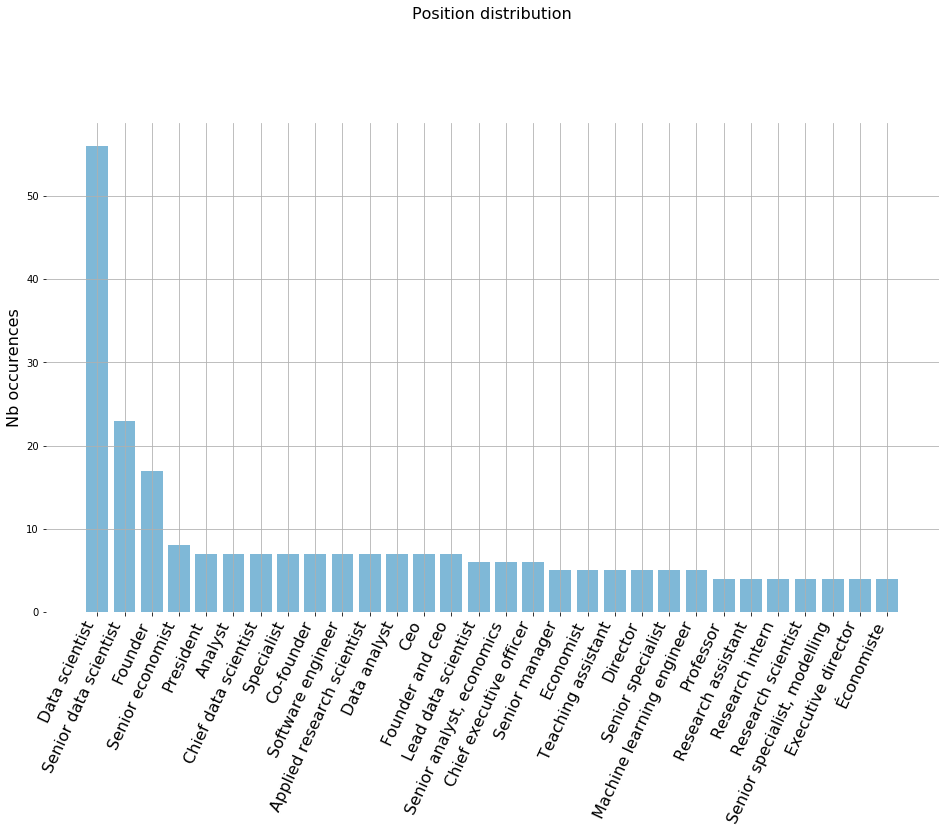

In [150]:
plot_bar_column(df, "Position")

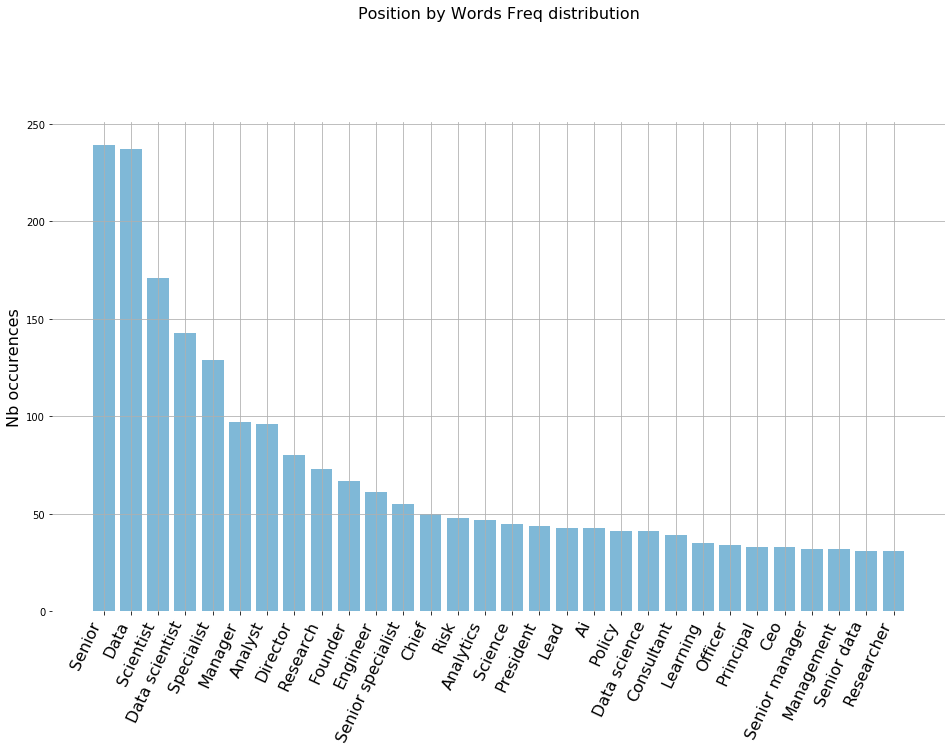

In [151]:
plot_nlp_cv(df)